In [ ]:
#Loading data set
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Reading data set
mydata = pd.read_csv(r"/content/Breast_Cancer.csv")

In [ ]:
mydata

# T stage
# The extent (size) of the tumor (T): How large is the cancer?  Has it grown into nearby areas?

# N stage
# The spread to nearby lymph nodes (N): Has the cancer spread to nearby lymph nodes? If so, how many?

# The spread (metastasis) to distant sites (M): Has the cancer spread to distant organs such as the lungs or liver?

# Estrogen status
# Estrogen Receptor (ER) status: Does the cancer have the protein called an estrogen receptor?

# Progesterone status
# Progesterone Receptor (PR) status: Does the cancer have the protein called a progesterone receptor?

# Grade
# Grade of the cancer (G): How much do the cancer cells look like normal cells?

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [ ]:
mydata.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [ ]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [ ]:
#Preprocessing

mydata.rename(columns={"T Stage ": "T Stage"}, inplace=True)
mydata["Grade"].replace({" anaplastic; Grade IV": "4"}, inplace=True)
mydata["Grade"] = mydata["Grade"].astype(int)
mydata["T Stage"].replace({"T1":1, "T2": 2, "T3":3, "T4": 4}, inplace=True)
mydata["N Stage"].replace({"N1":1, "N2": 2, "N3":3}, inplace=True)
mydata["6th Stage"].replace({"IIA":1, "IIB": 2, "IIIA":3, "IIIB": 4,"IIIC":5}, inplace=True)
mydata["differentiate"].replace({"Moderately differentiated": 2,
                            "Poorly differentiated": 1,
                            "Well differentiated": 3,
                            "Undifferentiated": 0}, inplace=True)
mydata["A Stage"].replace({"Regional":1, "Distant": 0}, inplace=True)
mydata["Estrogen Status"].replace({"Positive":1, "Negative": 0}, inplace=True)
mydata["Progesterone Status"].replace({"Positive":1, "Negative": 0}, inplace=True)
mydata["Status"].replace({"Alive":1, "Dead": 0}, inplace=True)

In [ ]:
mydata.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,1,1,1,1,3,1,4,1,1,24,1,60,1
1,50,White,Married,2,2,3,2,2,1,35,1,1,14,5,62,1
2,58,White,Divorced,3,3,5,2,2,1,63,1,1,14,7,75,1
3,58,White,Married,1,1,1,1,3,1,18,1,1,2,1,84,1
4,47,White,Married,2,1,2,1,3,1,41,1,1,3,1,50,1


In [ ]:
# Input and output features preparation

# The input features

X = mydata.drop(['Race', 'Status', 'Marital Status'], axis = 1)

# X will contain all the remaining columns (features) except "Race," and "Marital Status.

y = mydata['Status']



In [ ]:
X.shape

(4024, 13)

In [ ]:
# Perform one-hot encoding on categorical columns
X_encoded = pd.get_dummies(X, columns=['T Stage', 'N Stage', '6th Stage', 'differentiate', 'Estrogen Status', 'Progesterone Status'])

In [ ]:
print(X[:10])

   Age  T Stage  N Stage  6th Stage  differentiate  Grade  A Stage  \
0   68        1        1          1              1      3        1   
1   50        2        2          3              2      2        1   
2   58        3        3          5              2      2        1   
3   58        1        1          1              1      3        1   
4   47        2        1          2              1      3        1   
5   51        1        1          1              2      2        1   
6   51        1        1          1              3      1        1   
7   40        2        1          2              2      2        1   
8   40        4        3          5              1      3        1   
9   69        4        3          5              3      1        0   

   Tumor Size  Estrogen Status  Progesterone Status  Regional Node Examined  \
0           4                1                    1                      24   
1          35                1                    1                    

In [ ]:
#Split data set into training and testing dataset
from sklearn.model_selection import train_test_split

#Slpitiing the dataset
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size = 0.2)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3219, 13) (805, 13) (3219,) (805,)


In [ ]:
#Importing the regression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#Creating and fitting the model
Status_Dt = DecisionTreeRegressor(max_depth=5).fit(X_train, y_train)

In [ ]:
#The coefficient of determination
print('The training r_sq is : %.2f'% Status_Dt.score(X_train, y_train))

The training r_sq is : 0.46


In [ ]:
#Training model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [ ]:
#Prediction on the training dataset
ytrain_pred = Status_Dt.predict(X_train)

In [ ]:
# The r_sq
# determines the proportion of variance in the dependent variable that can be explained by the independent variable.
print('The r_sq is: ', r2_score(y_train, ytrain_pred))

The r_sq is:  0.4581903632667943


In [ ]:
#The MEAN absolute error
# Arithmetic average of the absolute diffrence between predicted and actual values
print('The mean absolute error is : ', mean_absolute_error(y_train,ytrain_pred))

The mean absolute error is :  0.14286719504228884


In [ ]:
#The mean squared error
# Mean of all the squared errors (Accuracy)
print('The mean squared error is : ', mean_squared_error(y_train,ytrain_pred))

The mean squared error is :  0.07143359752114443


In [ ]:
#The RMSE
# Measures the average difference between values predicted by a model and the actual values
print('The RMSE is : ', np.sqrt(mean_squared_error(y_train, ytrain_pred)))

The RMSE is :  0.26727064470522094


In [ ]:
#The Explained varience score (EVS)
# Dispersion of errors of a given data
print('The EVS is : ', explained_variance_score(y_train,ytrain_pred))

The EVS is :  0.4581903632667943


In [ ]:
#Prediction the testing data
ytest_pred = Status_Dt.predict(X_test)

In [ ]:
#The r_sq
# determines the proportion of variance in the dependent variable that can be explained by the independent variable.
print('The testing r_sq is : %.2f'% r2_score(y_test,ytest_pred))

The testing r_sq is : 0.36


In [ ]:
print('The testing r_sq is : %.2f'% Status_Dt.score(X_test, y_test))

The testing r_sq is : 0.36


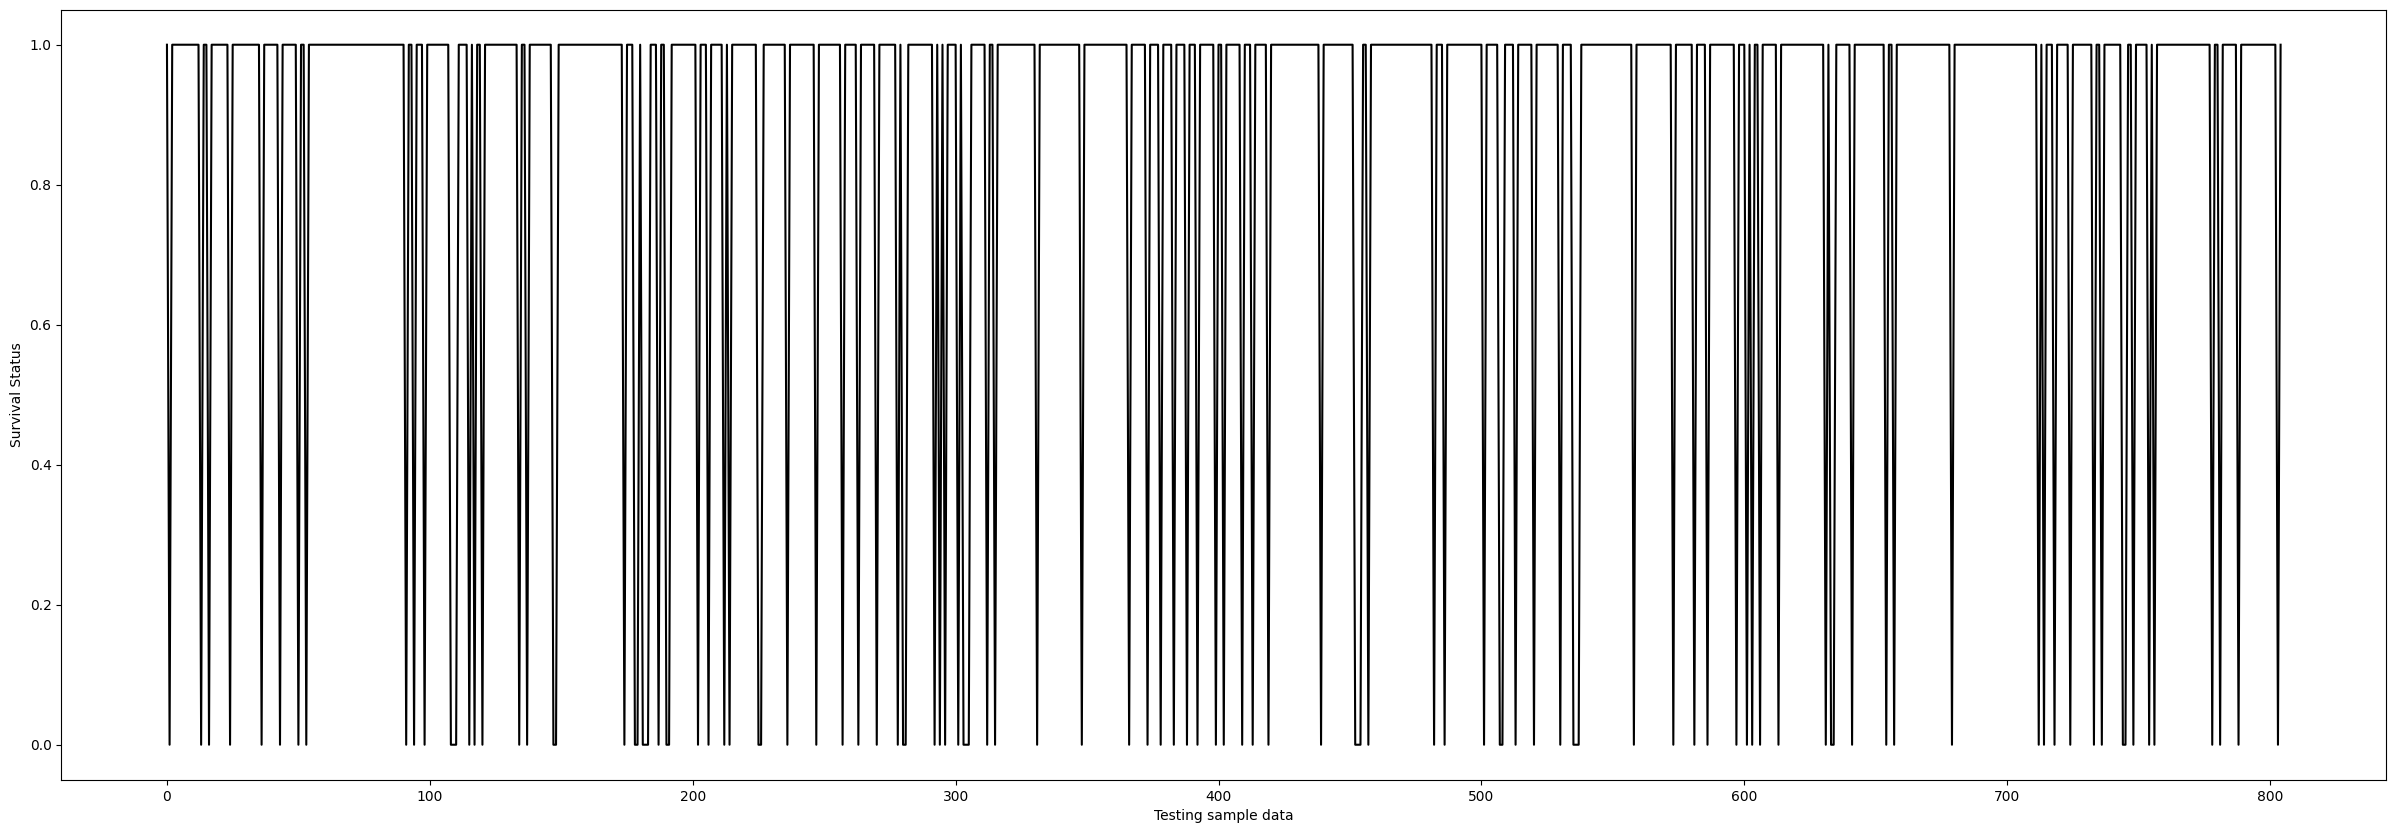

In [ ]:
#plotting the obeserved and predicted the Status
#Setting the boundaries and parameters
plt.rcParams['figure.figsize'] = (30,10)
x_ax = range(len(X_test))
#plotting
plt.plot(x_ax, y_test, label='observed', color='k', linestyle='-' )
# plt.plot(x_ax,ytest_pred, label = 'Predicted', color='k', linestyle='--')
plt.ylabel('Survival Status')
plt.xlabel('Testing sample data')
# plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'Lower center', ncol = 2, frameon = False)
plt.show()

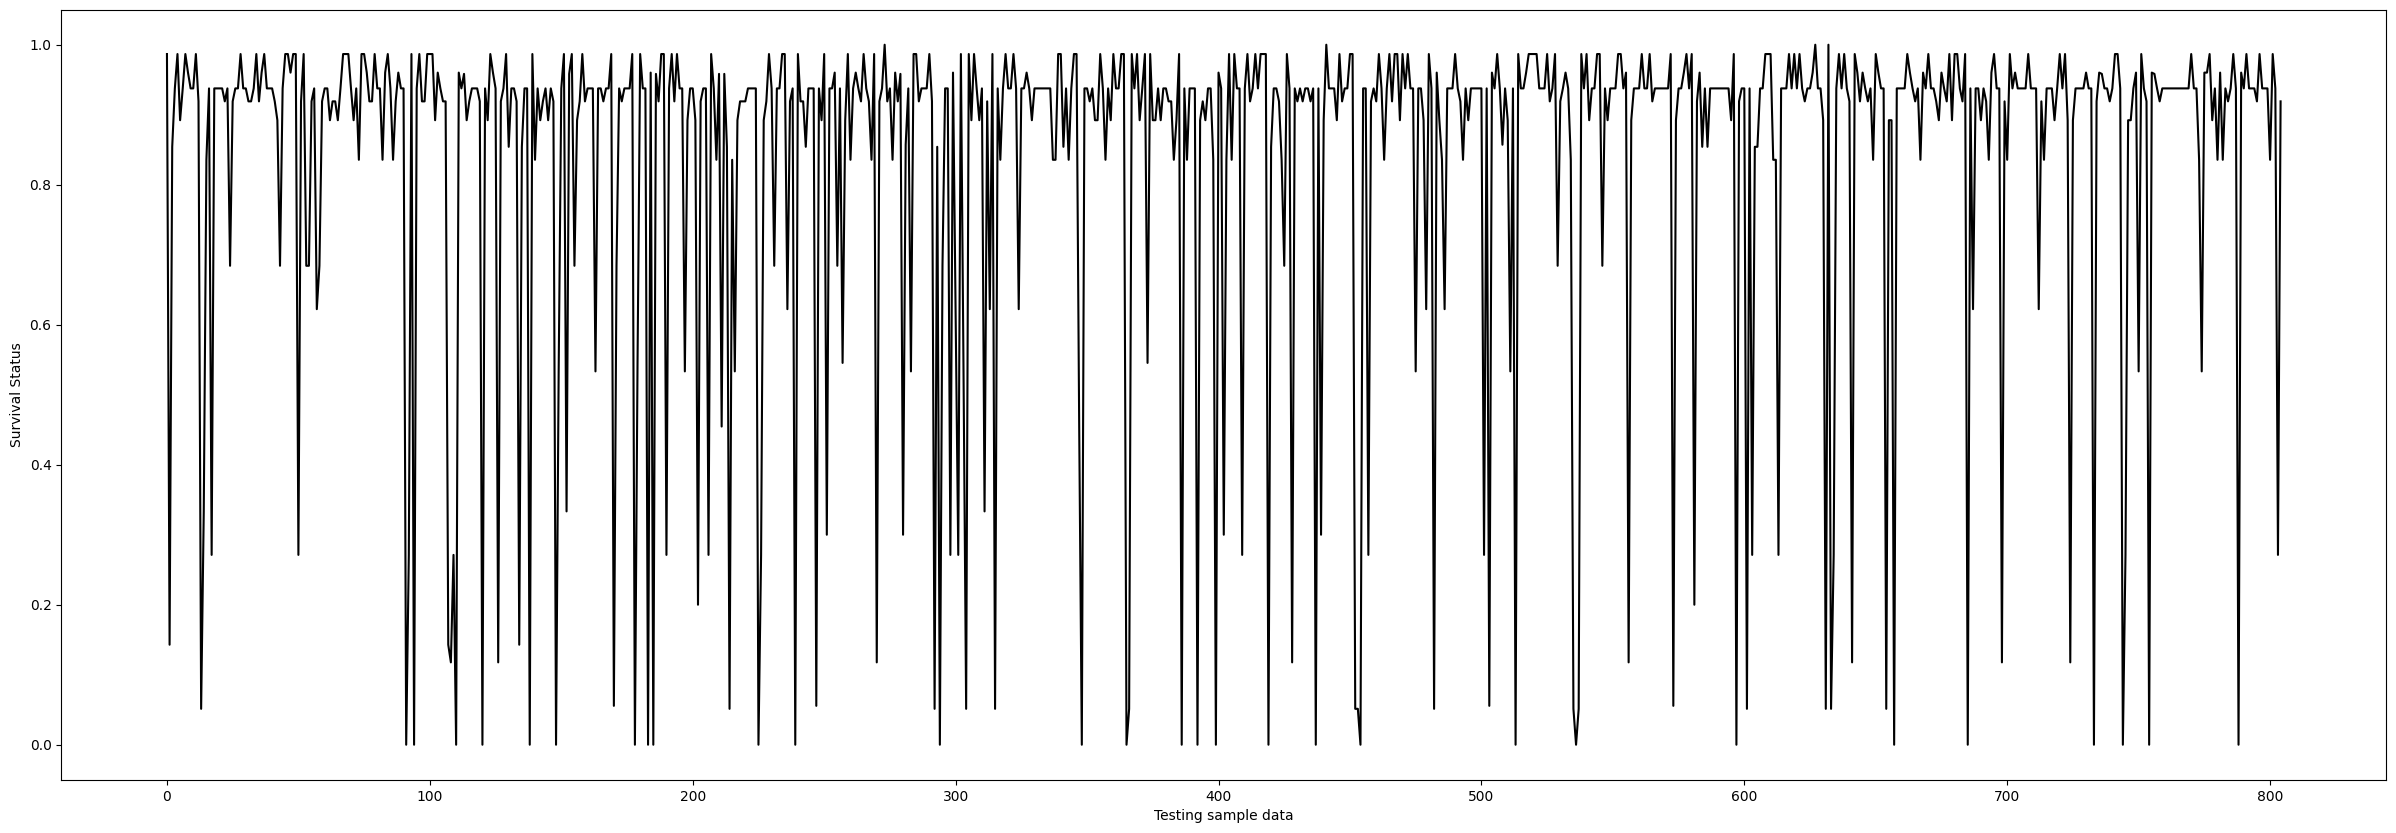

In [ ]:
#plotting the obeserved and predicted the Status
#Setting the boundaries and parameters
plt.rcParams['figure.figsize'] = (30,10)
x_ax = range(len(X_test))
#plotting
# plt.plot(x_ax, y_test, label='observed', color='k', linestyle='-' )
plt.plot(x_ax,ytest_pred, label = 'Predicted', color='k', linestyle='-')
plt.ylabel('Survival Status')
plt.xlabel('Testing sample data')
# plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'Lower center', ncol = 2, frameon = False)
plt.show()

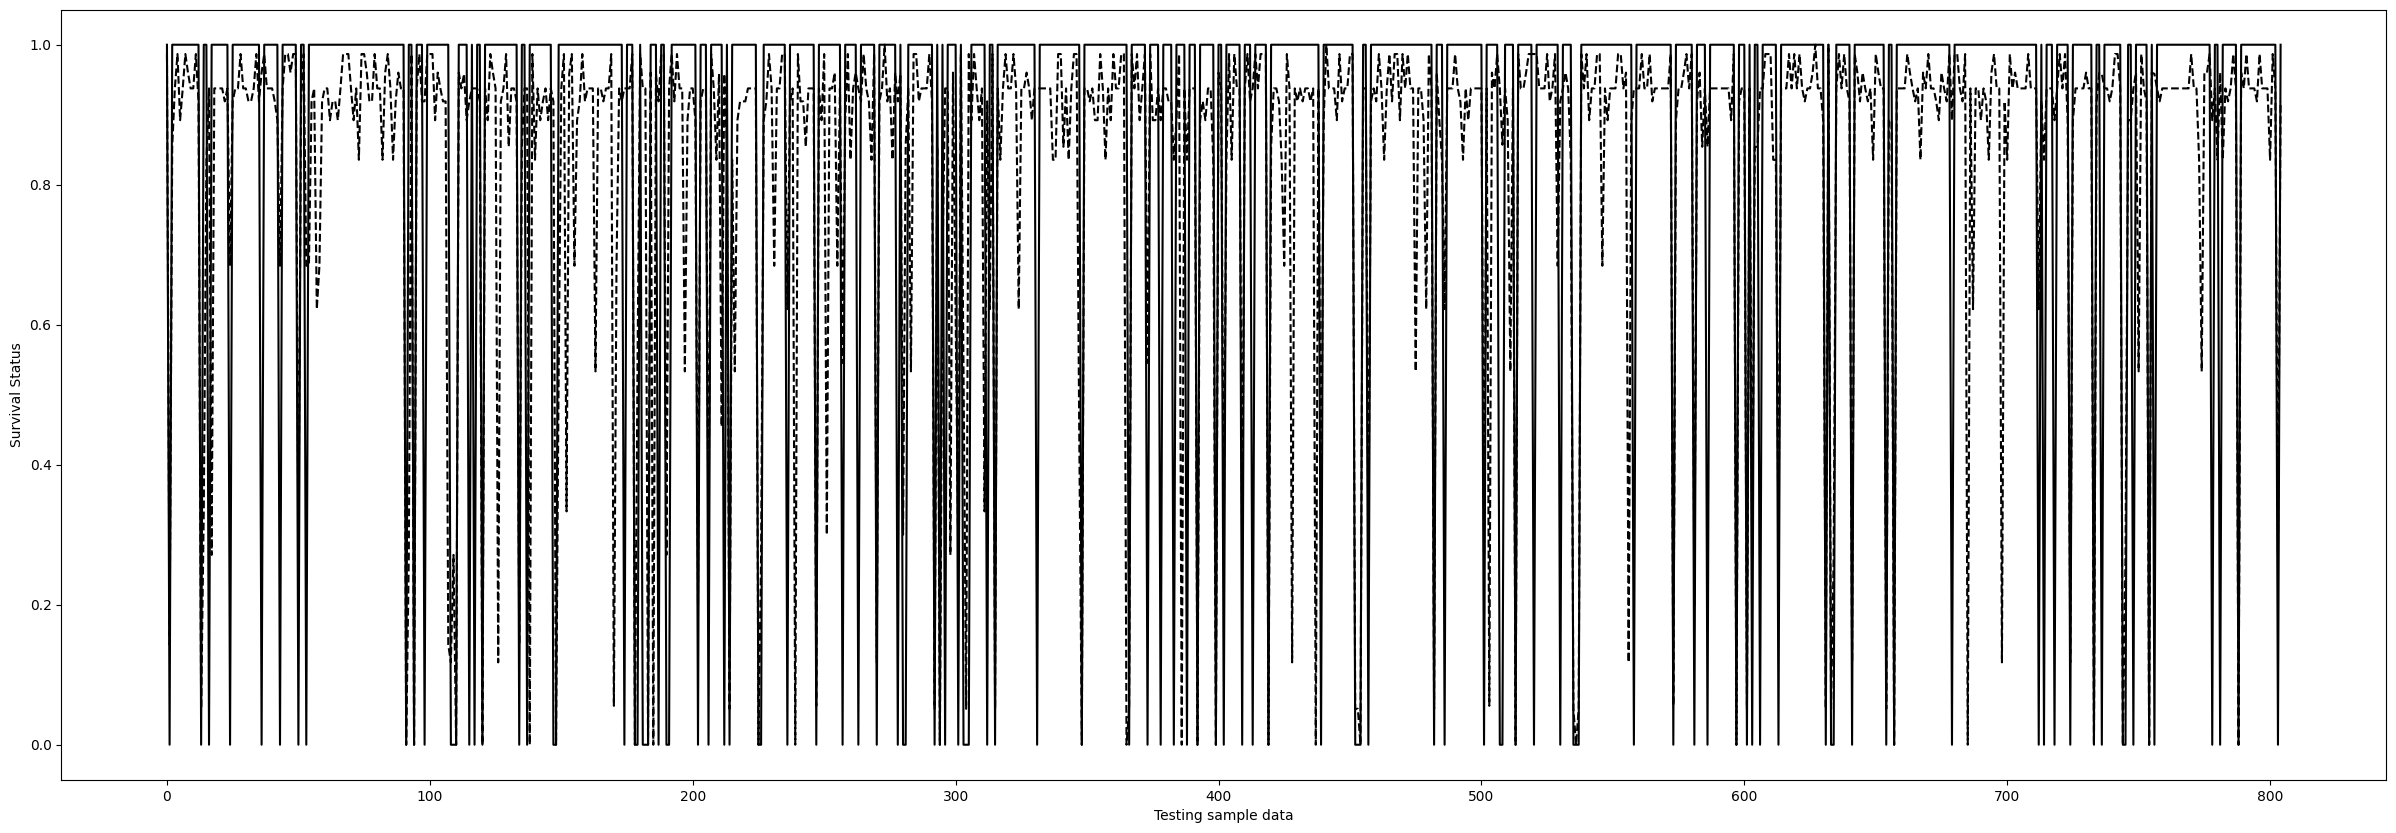

In [ ]:
#plotting the obeserved and predicted the Status
#Setting the boundaries and parameters
plt.rcParams['figure.figsize'] = (30,10)
x_ax = range(len(X_test))
#plotting
plt.plot(x_ax, y_test, label='observed', color='k', linestyle='-' )
plt.plot(x_ax,ytest_pred, label = 'Predicted', color='k', linestyle='--')
plt.ylabel('Survival Status')
plt.xlabel('Testing sample data')
# plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'Lower center', ncol = 2, frameon = False)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


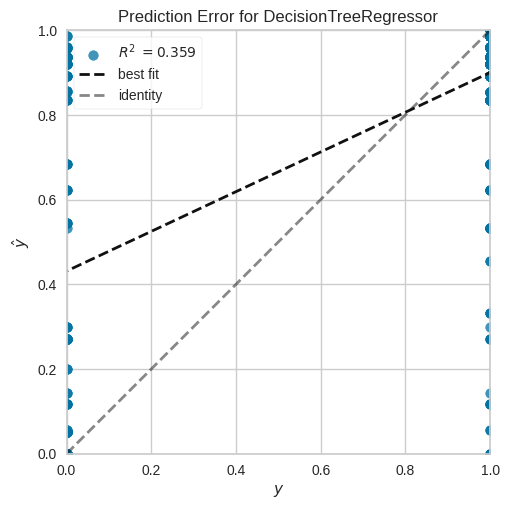

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
# Prediction errors
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(Status_Dt)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


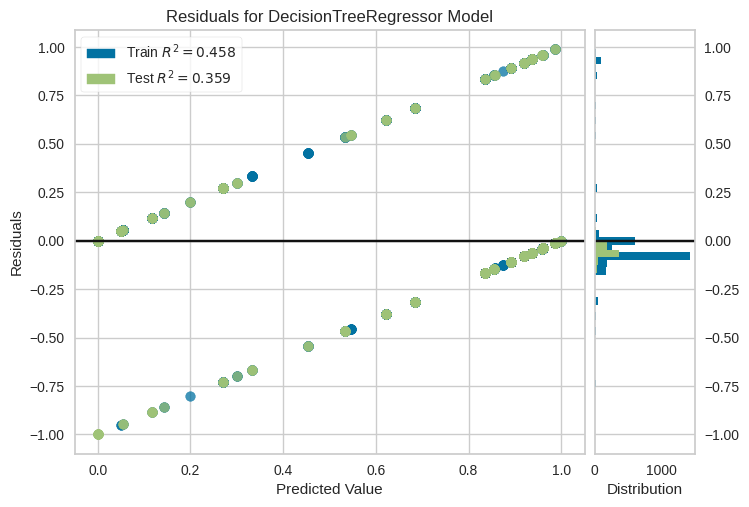

<Axes: title={'center': 'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
# Residual plot
from yellowbrick.regressor import ResidualsPlot
visualizer =  ResidualsPlot(Status_Dt)
visualizer.fit(X_train, y_train)
visualizer.score(X_test,y_test)
visualizer.poof()

In [ ]:
# Testing model evaluation
# Arithmetic average of the absolute diffrence between predicted and actual values
print('The MAE is : %.2f'% mean_absolute_error(y_test, ytest_pred))

The MAE is : 0.15


In [ ]:
# The MSE
# Mean of all the squared errors (Accuracy)
print('The MSE is : %.2f'% mean_squared_error(y_test,ytest_pred))

The MSE is : 0.08


In [ ]:
# The RMSE
# Measures the average difference between values predicted by a model and the actual values
print('The RMSE is : %.2f'% np.sqrt(mean_squared_error(y_test, ytest_pred)))

The RMSE is : 0.28


In [ ]:
# The EVS
# Dispersion of errors of a given data
print('The EVS is : %.2f'% explained_variance_score(y_test, ytest_pred))

The EVS is : 0.36


In [ ]:
# k-fold cross-validation
from sklearn.model_selection import cross_val_score

In [ ]:
#On the training dataset
score_train = cross_val_score(Status_Dt, X_train, y_train, scoring='neg_mean_squared_error', cv=10)

In [ ]:
score_train

array([-0.09480312, -0.08136156, -0.0856966 , -0.0807535 , -0.08594966,
       -0.10936688, -0.07457835, -0.08126789, -0.07380961, -0.10498458])

In [ ]:
score_train = np.mean(score_train)

In [ ]:
score_train

-0.0872571741993043

In [ ]:
# To make it positive
from numpy import absolute

In [ ]:
score_train = absolute(score_train)
score_train

0.0872571741993043

In [ ]:
#CV on the testing data
score_test = cross_val_score(Status_Dt, X_test, y_test, scoring='neg_mean_squared_error')

In [ ]:
score_test

array([-0.0768835 , -0.12171215, -0.04961723, -0.07433616, -0.08249451])

In [ ]:
#The mean score
score_test = np.mean(score_test)
score_test

-0.08100871016379206

In [ ]:
score_test=absolute(score_test)
score_test

0.08100871016379206

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

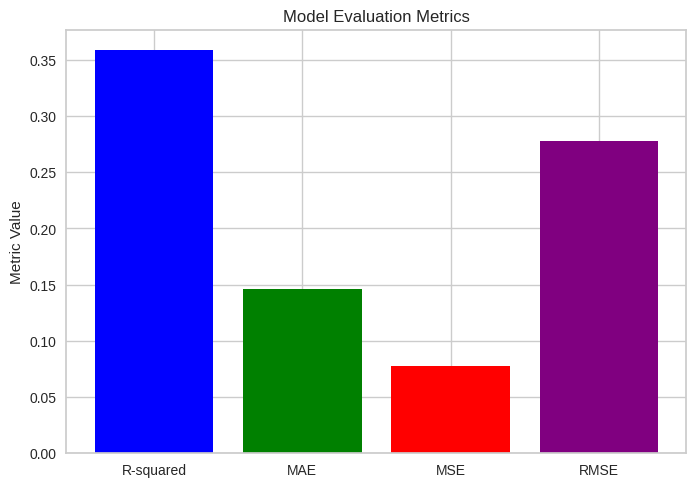

In [ ]:
# Evaluate the model and store the metrics
r_squared = Status_Dt.score(X_test, y_test)
mae = mean_absolute_error(y_test, ytest_pred)
mse = mean_squared_error(y_test, ytest_pred)
rmse = np.sqrt(mse)

# Create a bar chart to display the metrics
metrics = ['R-squared', 'MAE', 'MSE', 'RMSE']
values = [r_squared, mae, mse, rmse]

plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.ylabel('Metric Value')
plt.title('Model Evaluation Metrics')
plt.show()







In [ ]:
input_data = np.array([[68, 1, 1, 1, 1, 3, 1, 4, 1, 1, 24, 1, 60]])
predictions = Status_Dt.predict(input_data)
print(predictions)

[0.91907514]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
